# Описание проекта

###  Общая информация:
Работа в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. 

###  Цель исследования: 
Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

###  Данные:
Данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

###  Примечание:
1. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
2. Данные за 2016 год могут быть неполными.

###  Описание данных:
- `Name` — название игры;
- `Platform` — платформа; 
- `Year_of_Release` — год выпуска;
- `Genre` — жанр игры;
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий); 
- `EU_sales` — продажи в Европе (миллионы проданных копий);
- `JP_sales` — продажи в Японии (миллионы проданных копий);
- `Other_sales` — продажи в других странах (миллионы проданных копий);
- `Critic_Score ` — оценка критиков (максимум 100);
- `User_Score` — оценка пользователей (максимум 10);
- `Rating` —  рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию;


###  Ход исследования:
1. Открыть файл с данными и изучить общую информацию.
2. Подготовить данные (предобработка данных).
3. Провести исследовательский анализ данных.
4. Составить портрет пользователя каждого региона.
5. Написать общий вывод.

# 1. Откройте файл с данными и изучите общую информацию.

**1.Загружаем данные из файла в датафрейм.**

In [3]:
# импортируем все возможные библиотекив самом начале

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from tqdm import tqdm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [4]:
# безопасно открываем файл
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

**2. Изучаем общую информацию о полученном датафрейме.**

2.1. Выводим первые 10 строчек датафрейма df на экран.

In [5]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


2.2. Выведем основную информацию о датафрейме.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


2.3. Узнаем, есть ли в данных пропуски и явные дубликаты.

In [7]:
# суммарные пропуски
df.isna().sum().sort_values(ascending=False)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

In [8]:
# подсчет дубликатов
df.duplicated().sum() 

0

#  Вывод: 

В ходе изучения общей информации было замечено:
- большое количество пропусков, 
- некорректный тип данных, 
- в столбцах мы замечаем некорректные наименования (нужно привести к нижнему регистру).

Данных для исследования достаточно.

# 2. Предобработка данных.

**1. Исправим некорректные наименования.**

In [9]:
# приводим наименования в столбцах к нижнему регистру
df.columns = df.columns.str.lower()

# выводим на печать
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**2. Неявные дубликаты.**

Посмотрим на кол-во неявных дубликатов по столбцу name, platform, year_of_releas. 
Возьмем еще год, так как в 3 части исследования, чтобы получить истинное количество «игр по годам» нам следует поискать дубликаты и затем исключить из полного датафрейма все дубли за исключением одной, «первой», строки

In [10]:
df.duplicated(subset = ['name', 'platform', 'year_of_release'], keep = False).sum()

4

In [11]:
# выведим их для просмотра
df[df.duplicated(subset = ['name', 'platform', 'year_of_release'], keep = False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [12]:
df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep = 'first')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**3. Исправим некорректные типы данных.**

В данных смутили 3 столбца - это year_of_release, critic_score, user_score. Посмотрим на значения каждого из них.

In [13]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [14]:
# переведем столбец year_of_release в целочисленный тип, так как представлен только год без числел и месяцев
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [15]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [16]:
# переведем столбец critic_score в целочисленный тип, так как в значениях представлены целые числа с точкой
df['critic_score'] = df['critic_score'].astype('Int64')

In [17]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В данных мы видим помимо числел и nan, еще аббревиатуру TBD (она используется, чтобы сообщить, что что-то ещё не определено). Скорее всего, игра была не оценена или оценок было недостаточно. 
Чтобы нам перевести столбец в нужный тип данных float, необходимо заменить tbd (предлагаю на значение nan).

In [18]:
# переименуем
df = df.replace('tbd', np.nan)

df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [19]:
# переведем столбец user_score в вещественное число, так как в значениях представлены  числа с точкой
df['user_score'] = df['user_score'].astype('float64')

In [20]:
# узнаем тип значений в колонках
df.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score         float64
rating              object
dtype: object

**4. Найдём и изучим пропущенные значения в столбцах.**

In [21]:
# суммарные пропуски
df.isna().sum().sort_values(ascending=False)

user_score         9125
critic_score       8578
rating             6766
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Из 11 столбцов в 6 присутствуют пропуски.

Узнаем процент пропусков.

In [22]:
# процент пропуск в колонках
df.isna().mean().sort_values(ascending=False) * 100

user_score         54.591684
critic_score       51.319174
rating             40.478612
year_of_release     1.609333
name                0.011965
genre               0.011965
platform            0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
dtype: float64

Поговорим по каждой колонке отдельно.

1) <font color= 'purple'>**user_score** </font> - имеет наибольший процент пропусков, здесь содержутся данные об оценки пользователей. Эти данные оставим без изменений, так как оценки пользователей индивидуальны и устанавливать какую-либо оценку по медиане или среднему нецелесообразно. Это может исказить данные.

2) <font color= 'purple'>**critic_score** </font> - имеет также большой процент пропусков, здесь содержутся данные об оценки критиков. Эти данные оставим без изменений, так как оценки критиков также индивидуальны, то и устанавливать какую-либо оценку по медиане или среднему нецелесообразно. Это может исказить данные.

3) <font color= 'purple'>**rating** </font> - имеет тоже большой процент пропусков, здесь содержутся данные о рейтинге от организации ESRB . Предлагаю заменить пропущенные данные о возрастной категории на "unknown"(неизвестно). Таким образом, мы и данные не потеряем, и все-таки хотя бы визуально уберем пропуски.

In [23]:
df['rating'] = df['rating'].fillna('unknown')

4) <font color= 'purple'>**year_of_release** </font> - здесь содержутся данные о годе выпуска. Пропуски в этой колонке составляют менее 2% от общего числа датасетов, на мой взгляд, они не должны сильно повлиять на результаты исследования, поэтому можно их удалить.

In [24]:
df = df.dropna(subset = ['year_of_release'])

5) <font color= 'purple'>**name** </font> - здесь содержутся данные о названии игры. Пропуски в этой колонке составляют менее 1% от общего числа датасетов, на мой взгляд, они не должны сильно повлиять на результаты исследования, поэтому можно их удалить.

In [25]:
df = df.dropna(subset = ['name'])

6) <font color= 'purple'>**genre** </font> - здесь содержутся данные о жанре игры. Пропуски в этой колонке составляют менее 1% от общего числа датасетов, на мой взгляд, они не должны сильно повлиять на результаты исследования, поэтому можно их удалить.

In [26]:
df = df.dropna(subset = ['genre'])

Выведем количество пропущенных значений для каждого столбца после обработки.

In [27]:
df.isna().sum().sort_values(ascending=False)

user_score         8981
critic_score       8461
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
rating                0
dtype: int64

В процессе поиска пропущенных значений были замечены случайные пропуски, пропуски, связанные с человеческим фактором, технические ошибки. Некоторые пропуски удалось уменьшить.

**5. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец..**

In [28]:
# добавим новый столбец, воспользовавшись методом sum и 
# параметром axis со значением 1, чтобы применить метод ко всем строкам датафрейма
df['all_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# выведем на печать 
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,unknown,28.31


#  Вывод: 

В процессе предобработки данных удалось:

* Переименовать название столбцов, приведя имена к единому стилю.
* Заполнить пропуски в таблице.
* Изменить тип данных в соответствии с данными, находяшимися в столбцах.
* Добавить новый столбец с общей стоимостью продаж.

# 3. Проводим исследовательский анализ данных.

### Ответим на следующие вопросы.

### 3.1. Посмотрим, сколько игр выпускалось в разные годы.

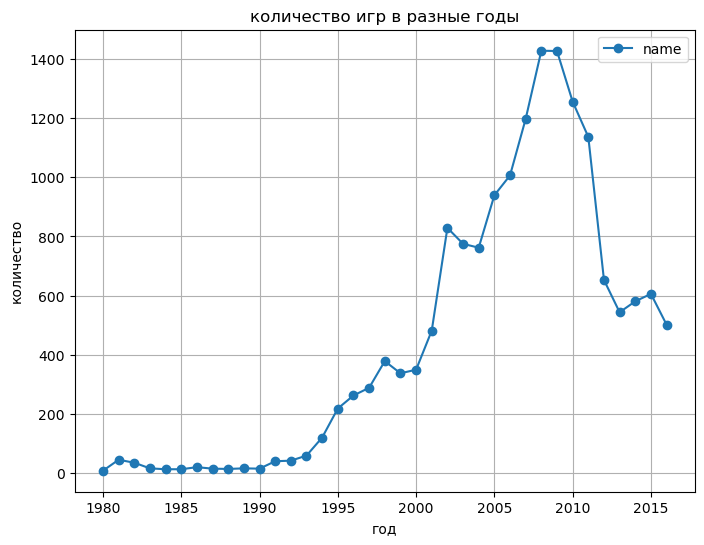

In [29]:
# группируем данные по годам, выбираем значение name, по которому мы хотим увидеть сводную таблицу, применяем count  
(
    df.pivot_table(index='year_of_release', values='name', aggfunc='count')
      .plot(grid=True, figsize=(8, 6), style='o-')
)
# установка заголовка графика
plt.title('количество игр в разные годы')
# добавление подписей осей
plt.xlabel('год')
plt.ylabel('количество')
# показ графика
plt.show()

**Вывод.**

* Из данные мы видим, что игры выпускались с 1980 по 2016 год. 
* Наименьшее количесвто игр было выпущено до 1994 года, это может быть связано с тем, что индустрия в то время только развивалась, было мало инвесторов и финансовой помощи со стороны, так же технологических инструементов могло быть недостаточно.
* С 1995 года ситуация начинает значительно меняться и идет по восходящей вплоть до 2009 года. Это может быть связано с появлением большего количества жанров, аудиторией, которая начинает расти и провялять больший интерес к новому виду искусства, с развивитием технологий. 
* 2008 и 2009 года можно назвать пиком индустрии компьютерных игр - количество игр достигало более 1400.
* С 2010 года начинается спад
* А в период с 2012 по 2016 год в среднем выпускаемое количесвто игр не сильно разнилось.

Хоть данных до 1994 года мало и значительный рост наблюдается уже после 1995 г, на мой взгляд, все-таки данные стоит сохранить все,чуть позже уже будем выбирать период в зависимости от поставленных задач.

### 3.2. Посмотрим, как менялись продажи по платформам.

**Выберем платформы с наибольшими суммарными продажами.**

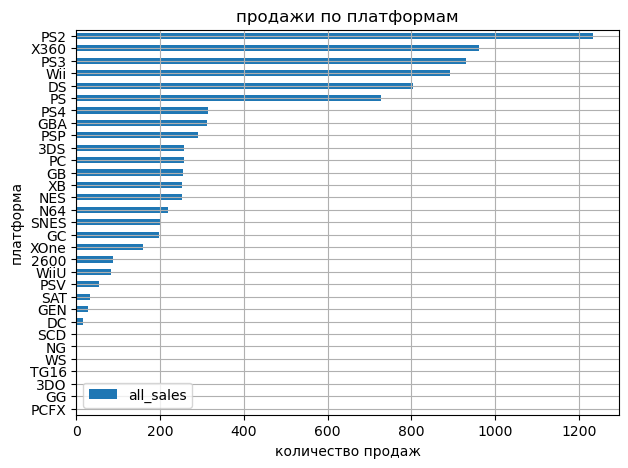

In [30]:
# группируем данные по платформам, выбираем значение all_sales, по которому мы хотим увидеть сводную таблицу, применяем sum
# сортируем платформы по суммарным продажам
(
    df.pivot_table(index='platform', values='all_sales', aggfunc='sum')
      .sort_values(by='all_sales', ascending=True)
      .plot(grid=True, figsize=(7, 5), style='o-', kind='barh')
)
# установка заголовка графика
plt.title('продажи по платформам')
# добавление подписей осей
plt.xlabel('количество продаж')
plt.ylabel('платформа')
# показ графика
plt.show()

Наиболее популярные по продажам платформы стали: PS2, X360, PS3, Wii, DS, PS. 

Выберем платформы с наибольшими суммарными продажами и построим распределения по годам.

<font color= 'purple'>**PS2** </font> 

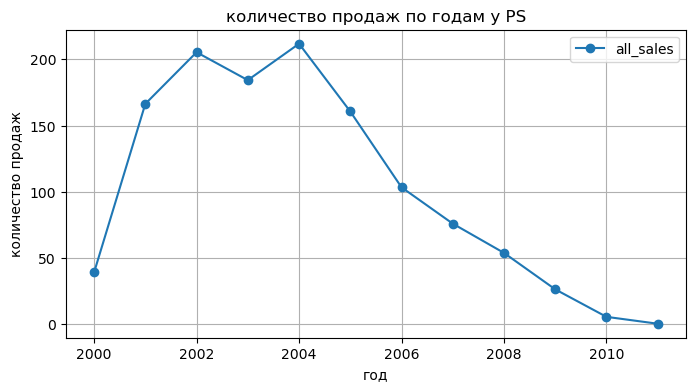

In [31]:
# выбираем необходимый срез, группируем данные по годам, выбираем значение all_sales, 
# по которому мы хотим увидеть сводную таблицу, применяем sum
# строим график
(

    pd.pivot_table(df.query('platform == "PS2"'), index='year_of_release', values='all_sales', aggfunc='sum')
      .plot(grid=True, figsize=(8,4), style='o-')
)

# установка заголовка графика
plt.title('количество продаж по годам у PS')
# добавление подписей осей
plt.xlabel('год')
plt.ylabel('количество продаж')
# показ графика
plt.show()



Игры на PS2 продавались с 2000 по 2011 год. Пик продаж приходится на 2002-2004 год. В течние первых 4 лет PS2 набирала и удерживала популярность, далее количесвто продаж падало. 

PS2
X360
PS3
Wii
DS
PS


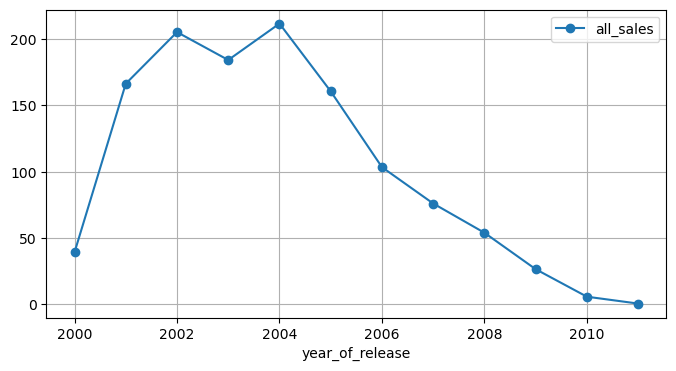

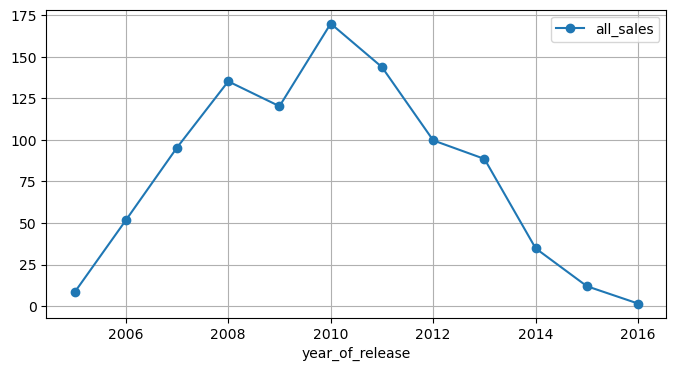

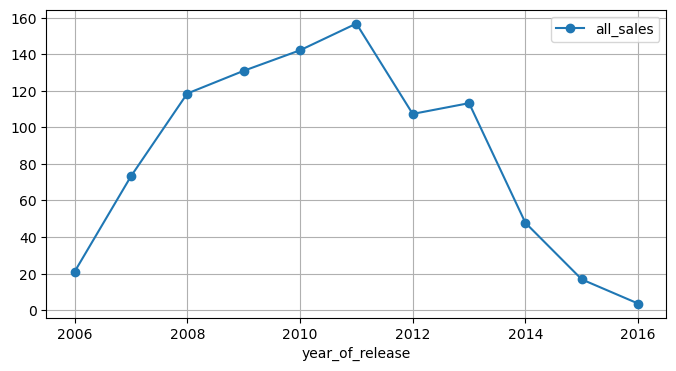

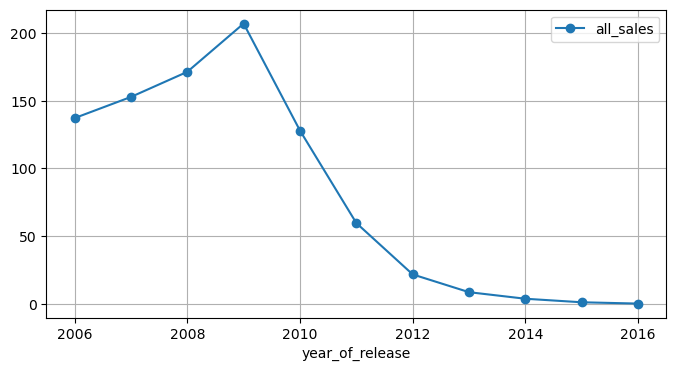

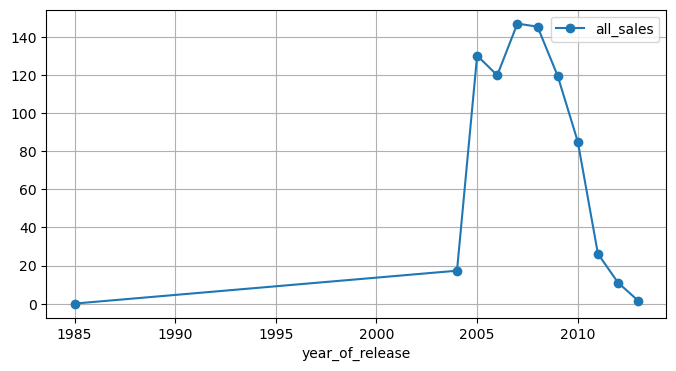

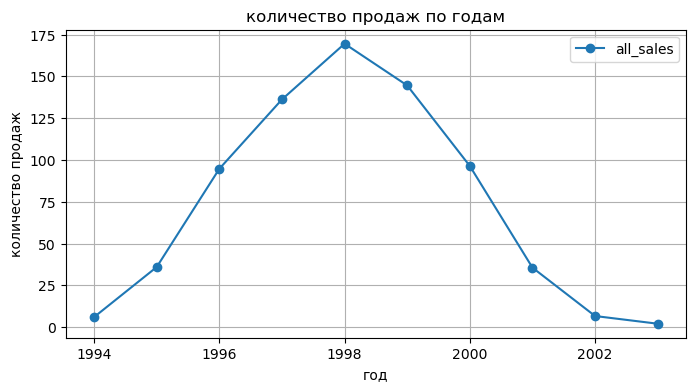

In [32]:
tmp = df.pivot_table(index='platform', values='all_sales', aggfunc= 'sum').sort_values('all_sales', ascending=False)
tmp = tmp.index[:6].tolist()
tmp

for name in tmp:
    print(name)
    (df
     .query('platform == @name')
     .pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
     .plot(grid=True, figsize=(8,4), style='o-')
    )

# установка заголовка графика
plt.title('количество продаж по годам')
# добавление подписей осей
plt.xlabel('год')
plt.ylabel('количество продаж')
# показ графика
plt.show()    


<font color= 'purple'>**X360** </font> 

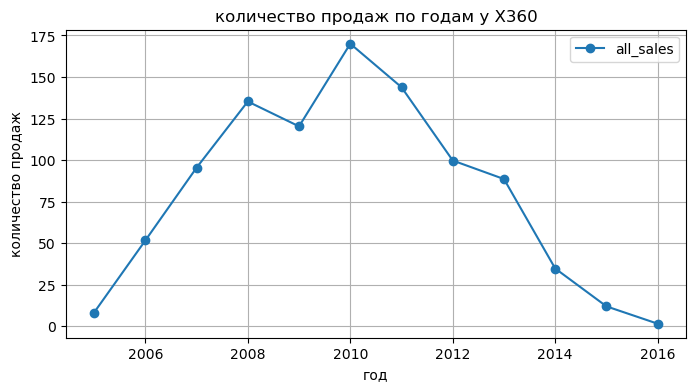

In [33]:
# выбираем необходимый срез, группируем данные по годам, выбираем значение all_sales, 
# по которому мы хотим увидеть сводную таблицу, применяем sum
# строим график
(

    pd.pivot_table(df.query('platform == "X360"'), index='year_of_release', values='all_sales', aggfunc='sum')
      .plot(grid=True, figsize=(8,4), style='o-')
)

# установка заголовка графика
plt.title('количество продаж по годам у X360')
# добавление подписей осей
plt.xlabel('год')
plt.ylabel('количество продаж')
# показ графика
plt.show()


Игры на X360 продавались с 2005 по 2016 год. Пик продаж приходится на 2010 год. В течние первых 5 лет X360 набирала и удерживала популярность, далее количество продаж падало. 

<font color= 'purple'>**PS3** </font> 

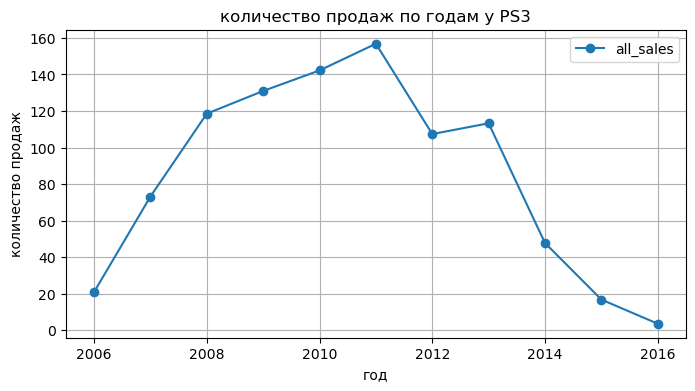

In [34]:
# выбираем необходимый срез, группируем данные по годам, выбираем значение all_sales, 
# по которому мы хотим увидеть сводную таблицу, применяем sum
# строим график
(

    pd.pivot_table(df.query('platform == "PS3"'), index='year_of_release', values='all_sales', aggfunc='sum')
      .plot(grid=True, figsize=(8,4), style='o-')
)

# установка заголовка графика
plt.title('количество продаж по годам у PS3')
# добавление подписей осей
plt.xlabel('год')
plt.ylabel('количество продаж')
# показ графика
plt.show()

Игры на PS3 продавались с 2006 по 2016 год. Пик продаж приходится на 2011 год. В течние первых 5 лет PS3 набирала и удерживала популярность, далее количество продаж падало. 

<font color= 'purple'>**Wii** </font> 

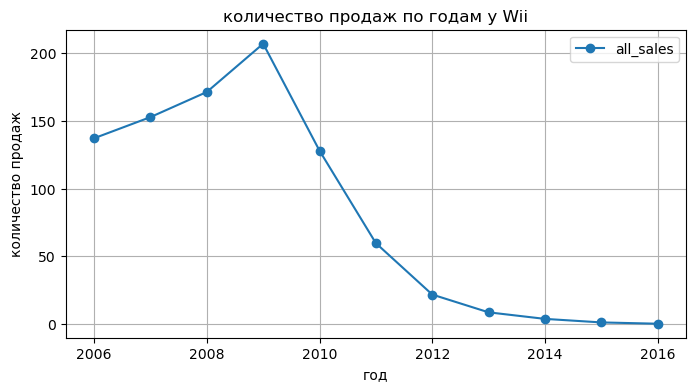

In [35]:
# выбираем необходимый срез, группируем данные по годам, выбираем значение all_sales, 
# по которому мы хотим увидеть сводную таблицу, применяем sum
# строим график
(

    pd.pivot_table(df.query('platform == "Wii"'), index='year_of_release', values='all_sales', aggfunc='sum')
      .plot(grid=True, figsize=(8,4), style='o-')
)

# установка заголовка графика
plt.title('количество продаж по годам у Wii')
# добавление подписей осей
plt.xlabel('год')
plt.ylabel('количество продаж')
# показ графика
plt.show()

Игры на Wii продавались с 2006 по 2016 год. Пик продаж приходится на 2009 год. В течние первых 3 лет Wii набирала и удерживала популярность, далее количество продаж падало. 

<font color= 'purple'>**DS** </font> 

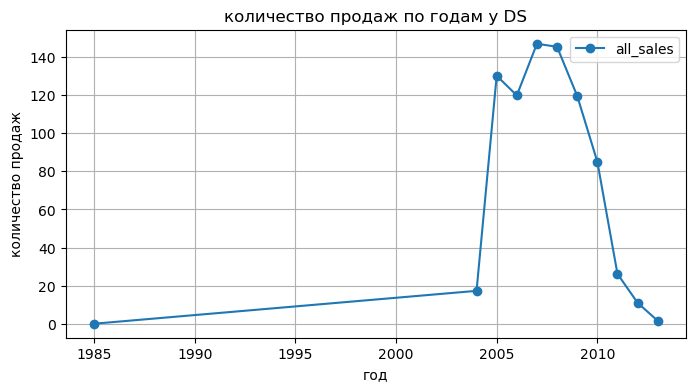

In [36]:
# выбираем необходимый срез, группируем данные по годам, выбираем значение all_sales, 
# по которому мы хотим увидеть сводную таблицу, применяем sum
# строим график
(

    pd.pivot_table(df.query('platform == "DS"'), index='year_of_release', values='all_sales', aggfunc='sum')
      .plot(grid=True, figsize=(8,4), style='o-')
)

# установка заголовка графика
plt.title('количество продаж по годам у DS')
# добавление подписей осей
plt.xlabel('год')
plt.ylabel('количество продаж')
# показ графика
plt.show()

Игры на DS продавались с 1985 по 2011 год. Пик продаж приходится на 2007-2008 год. В течние первых 19 лет прирост шел очень медленно, далее мы видим невероятный скачок с 2004 по 2005 год, количества продаж стало в 6 раз больше, далее в течение 3 лет Wii набирала и удерживала популярность, после количество продаж падало. 

<font color= 'purple'>**PS** </font> 

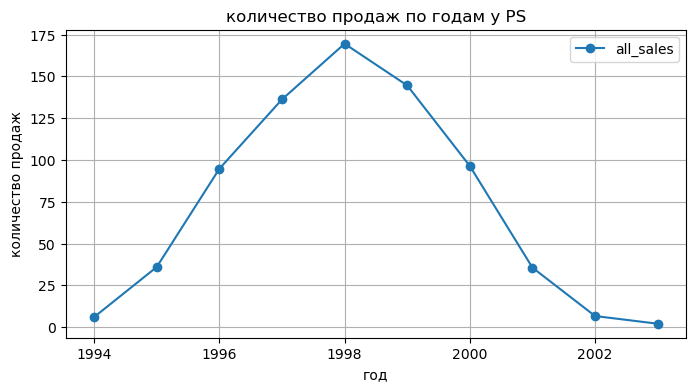

In [37]:
# выбираем необходимый срез, группируем данные по годам, выбираем значение all_sales, 
# по которому мы хотим увидеть сводную таблицу, применяем sum
# строим график
(

    pd.pivot_table(df.query('platform == "PS"'), index='year_of_release', values='all_sales', aggfunc='sum')
      .plot(grid=True, figsize=(8,4), style='o-')
)

# установка заголовка графика
plt.title('количество продаж по годам у PS')
# добавление подписей осей
plt.xlabel('год')
plt.ylabel('количество продаж')
# показ графика
plt.show()

Игры на PS продавались с 1994 по 2003 год. Пик продаж приходится на 1998 год. В течние первых 4 лет PS набирала и удерживала популярность, далее количество продаж падало. 

**Посмотрим на количество продаж по годам у топ платформ вместе.**

Text(0, 0.5, 'Продажи')

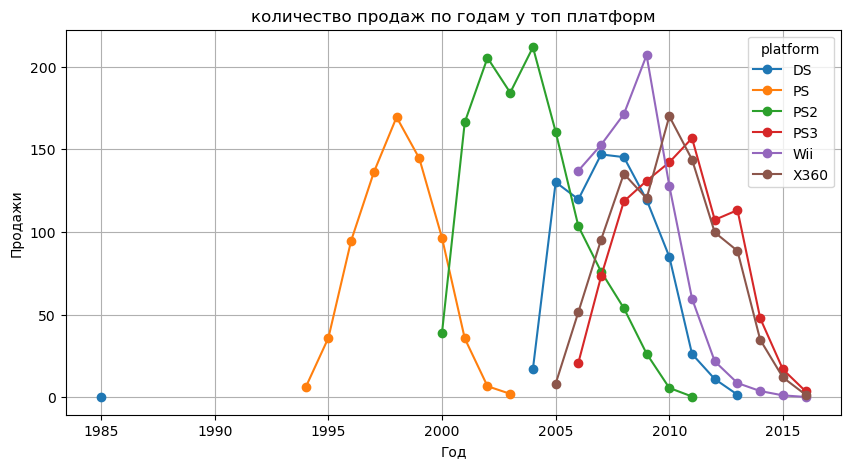

In [38]:
# создаем переменную с топ платформами
top_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

# выбираем необходимый срез, группируем данные по годам, выбираем значение all_sales, 
# по которому мы хотим увидеть сводную таблицу, применяем sum
(
pd.pivot_table(df.query('platform == @top_platform'), index='year_of_release', columns='platform', 
               values='all_sales', aggfunc='sum')
                 .plot(grid=True, figsize=(10,5), style='o-')
)

# установка заголовка графика
plt.title('количество продаж по годам у топ платформ')
# добавление подписей осей
plt.xlabel('Год')
# показ графика
plt.ylabel('Продажи')

**Вывод.**

Наибольшее количество продаж было у игр для PS2. Следующие по продажам стали: X360, PS3, Wii, DS, PS.

* Игры на PS2 продавались с 2000 по 2011 год. Пик продаж приходится на 2002-2004 год. В течние первых 4 лет PS2 набирала и удерживала популярность, далее количесвто продаж падало.
* Игры на X360 продавались с 2005 по 2016 год. Пик продаж приходится на 2010 год. В течние первых 5 лет X360 набирала и удерживала популярность, далее количество продаж падало.
* Игры на PS3 продавались с 2006 по 2016 год. Пик продаж приходится на 2011 год. В течние первых 5 лет PS3 набирала и удерживала популярность, далее количество продаж падало. 
* Игры на Wii продавались с 2006 по 2016 год. Пик продаж приходится на 2009 год. В течние первых 3 лет Wii набирала и удерживала популярность, далее количество продаж падало.
* Игры на DS продавались с 1985 по 2011 год. Пик продаж приходится на 2007-2008 год. В течние первых 19 лет прирост шел очень медленно, далее мы видим невероятный скачок с 2004 по 2005 год, количества продаж стало в 6 раз больше, далее в течение 3 лет Wii набирала и удерживала популярность, после количество продаж падало.
* Игры на PS продавались с 1994 по 2003 год. Пик продаж приходится на 1998 год. В течние первых 4 лет PS набирала и удерживала популярность, далее количество продаж падало.

Новые платформы быстро набирают популярность, наращивают/удерживают ее в течение 3-5 лет после их выхода и затем их продажи снижаются. 
В среднем игры на одной платформе выпускались в течение 10 лет.
Также видно, что на графике распределения суммарных продаж по годам для платформы DS имеется выброс, относящийся к 1985 году.


**В связи с вышесказанным возьмем данные только за соответствующий актуальный период.** 

**В среднем жизнь платформы составляет примерно 10 лет, а пик продаж достигается примерно через 3-5, следовательно, актуальный период предлагаю взять с 2014 года.** 

In [40]:
# создаем таблицу, в которую включим только актуальную по годам информацию
df_new = df.query('year_of_release >= 2014')

# проверим данные в столбце year_of_release
df_new['year_of_release'].unique()

### 3.3. Посмотрим потенциально прибыльные платформы.

Посмотрим, какие платформы лидируют по продажам, растут или падают.

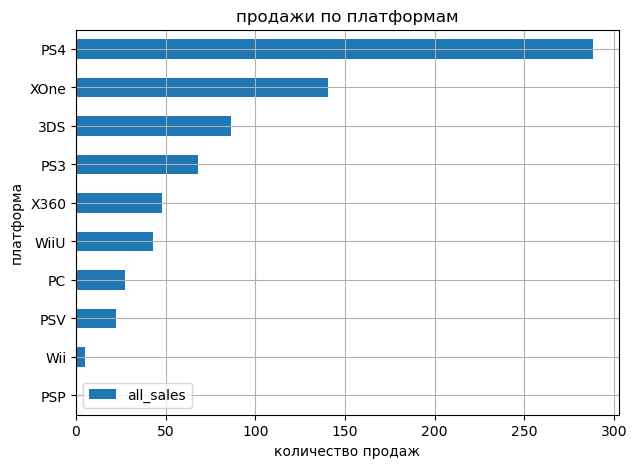

In [41]:
# группируем данные по платформам, выбираем значение all_sales, по которому мы хотим увидеть сводную таблицу, применяем sum
# сортируем платформы по суммарным продажам
(
    df_new.pivot_table(index='platform', values='all_sales', aggfunc='sum')
      .sort_values(by='all_sales', ascending=True)
      .plot(grid=True, figsize=(7, 5), style='o-', kind='barh')
)
# установка заголовка графика
plt.title('продажи по платформам')
# добавление подписей осей
plt.xlabel('количество продаж')
plt.ylabel('платформа')
# показ графика
plt.show()

График значительно изменился после выбранного диапазона годов. Теперь наиболее популярной по продажам платформой стала: PS4. С большим отрывом от нее идут XOne, 3DS, PS3.

**Посмотрим на количество продаж по годам у топ платформ вместе.**

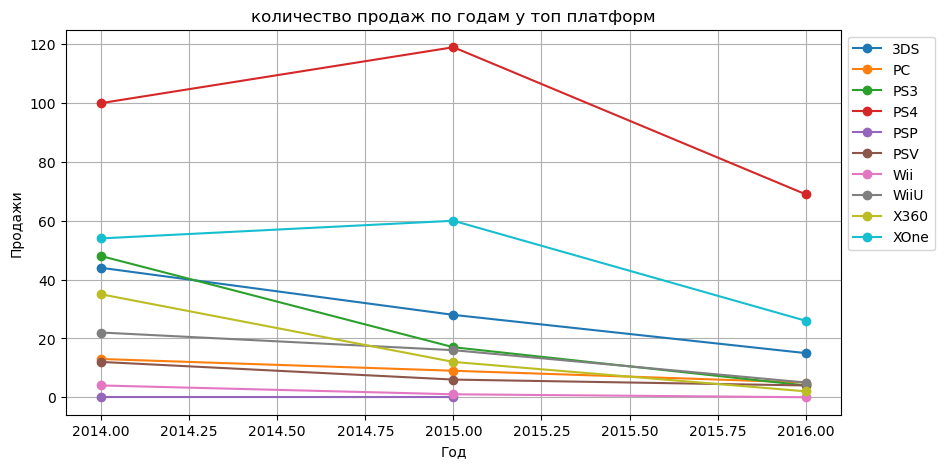

In [42]:
# создаем переменную с топ платформами
top_platform = ['PS4','XOne','3DS','PS3','X360','WiiU','PC','PSV','Wii','PSP']

# выбираем необходимый срез, группируем данные по годам, выбираем значение all_sales, 
# по которому мы хотим увидеть сводную таблицу, применяем sum
(
pd.pivot_table(df_new.query('platform == @top_platform'), index='year_of_release', columns='platform', 
               values='all_sales', aggfunc='sum').round(0)
                 .plot(grid=True, figsize=(10,5), style='o-')
)

# установка заголовка графика
plt.title('количество продаж по годам у топ платформ')
# добавление подписей осей
plt.xlabel('Год')
# показ графика
plt.ylabel('Продажи')
plt.legend (loc="upper left", bbox_to_anchor=(1,1))

**Вывод.**

Теперь наиболее популярной по продажам платформой стала: PS4.
По графику также заметно, что до 2015 года растут платформы: PS4, XOne. Остальные только падают. 
В целом можно сказать, что все эти платформы к 2016 году теряют продажи. 

Относительно на пике остаются 3 платформы: PS4, XOne, 3DS. Следовательно, именно их мы можем считать потенциально прибыльными платформами.

In [43]:
# создаем таблицу, в которую включим только актуальную по платформам информацию
df_new_platform = df_new.query('platform == ["PS4", "XOne", "3DS"]')

# проверим данные в столбце year_of_release
df_new_platform['platform'].unique()

array(['PS4', '3DS', 'XOne'], dtype=object)

### 3.4. Построим график «ящик с усами» по глобальным продажам игр в разбивке по  платформам. 

**Построим график по глобальным продам по всем платформам за 2014-2016 год.**

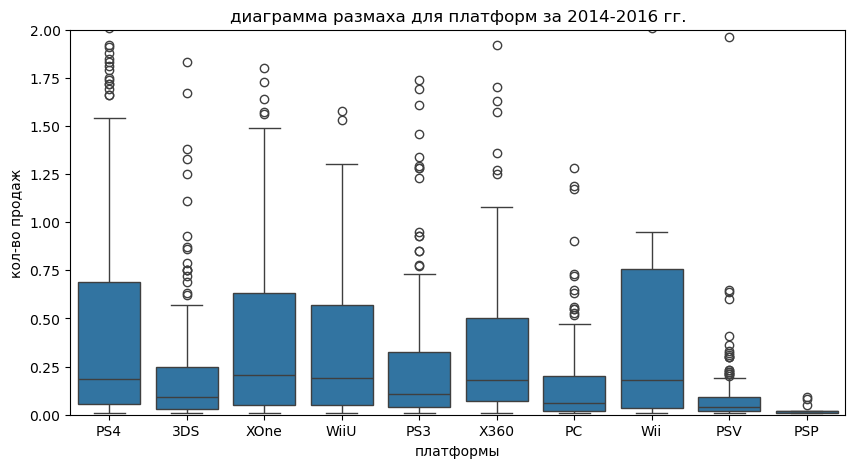

In [44]:
plt.figure(figsize=(10, 5))
(sns.boxplot(data = df_new, y = 'all_sales', x='platform')
    .set(title = 'диаграмма размаха для платформ за 2014-2016 гг.', 
         xlabel = 'платформы', 
         ylabel = 'кол-во продаж',
         ylim=(0, 2)))
plt.show()

На данном графике мы видим большое количество выбросов, возможно, это связано с тем, что компаниям может приносить высокую прибыль отдельные проекты и игры, пользующиеся большой популярностью. Наиболее прибыльными являются PS4, Wii и X360. Самая маленькая прибыль у PSP и PSV за 2014-2016 гг. Так же медиана протекает у всех по разному.
Практически во всех распределениях для каждой платформы имеются длинные хвосты с высокими значениями, то есть среднее для таких распределений будет куда выше, чем медианное значение.

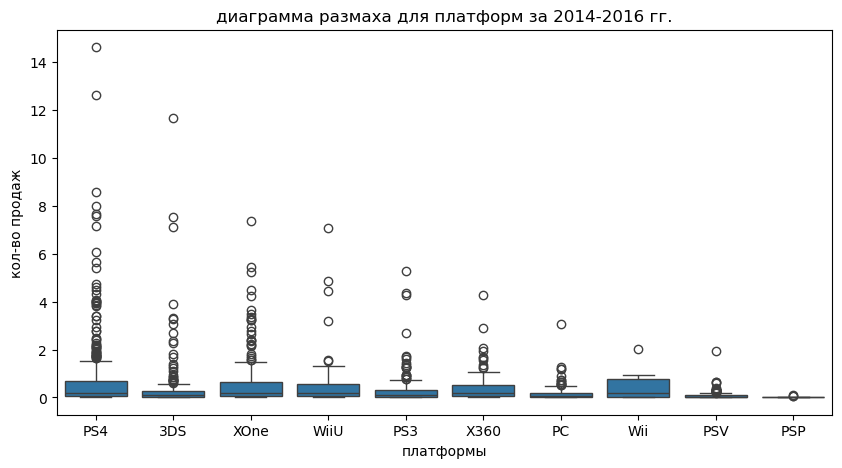

In [45]:
plt.figure(figsize=(10, 5))
(sns.boxplot(data = df_new, y = 'all_sales', x='platform')
    .set(title = 'диаграмма размаха для платформ за 2014-2016 гг.', 
         xlabel = 'платформы', 
         ylabel = 'кол-во продаж',
         ))
plt.show()

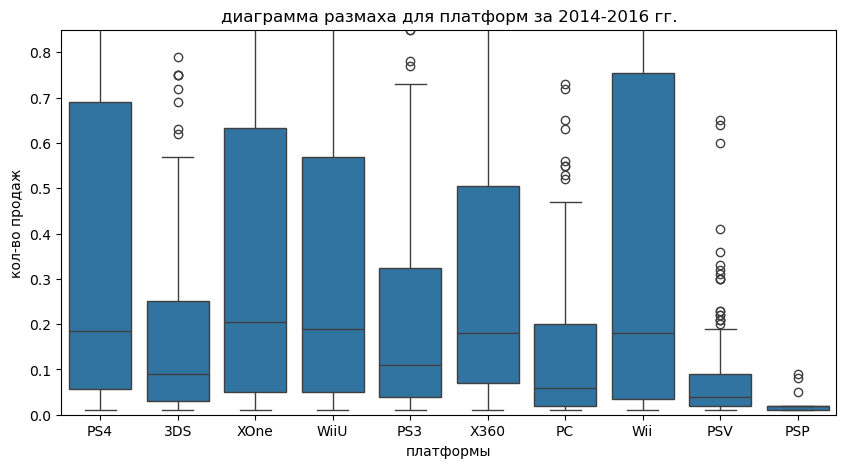

In [46]:
plt.figure(figsize=(10, 5))
(sns.boxplot(data = df_new, y = 'all_sales', x='platform')
    .set(title = 'диаграмма размаха для платформ за 2014-2016 гг.', 
         xlabel = 'платформы', 
         ylabel = 'кол-во продаж',
         ylim=(0, 0.85)))
plt.show()

**Построим график по глобальным продажам по потенциально прибыльным платформам за 2014-2016 год.**

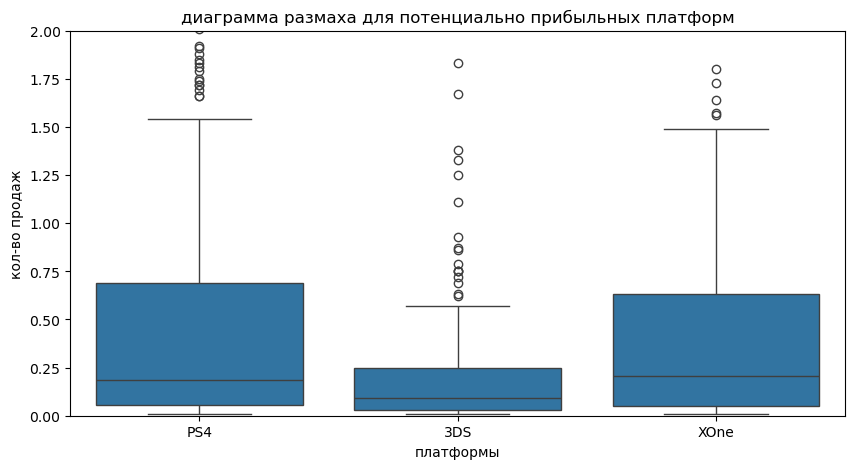

In [47]:
plt.figure(figsize=(10, 5))
(sns.boxplot(data = df_new_platform, y = 'all_sales', x='platform')
    .set(title = 'диаграмма размаха для потенциально прибыльных платформ', 
         xlabel = 'платформы', 
         ylabel = 'кол-во продаж',
         ylim=(0, 2)))
plt.show()

Первое, что заметно в графике - это распределения для PS4 и XOne, они похожи. Их медиана находится примерно на одном уровне в районе 0,2, размах "усов" тоже практически совпадает. Для 3DS медиана чуть меньше, как и размах "усов".

**Вывод.**

На мой взгляд, для дальнейшего исследования и планирования рекламной кампании на 2017 год стоит выбрать платформы PS4 или XOne.

In [48]:
# создаем таблицу, в которую включим только актуальную по платформам информацию
df_top_platform = df_new.query('platform == ["PS4", "XOne"]')

# проверим данные в столбце year_of_release
df_top_platform['platform'].unique()

array(['PS4', 'XOne'], dtype=object)

### 3.5. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Влияние на продажи рассмотрим на примере двух выше выбранных платформ: на PS4 и XOne.

<font color= 'purple'>**PS4** </font> 

**Влияние отзывов пользователей на кол-во продаж.**

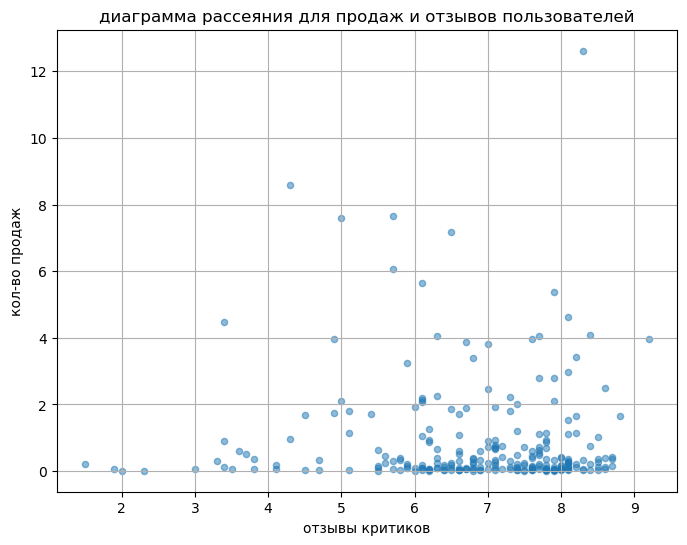

In [49]:
# посмотрим на график
(
    df_top_platform.query('platform == "PS4"')
                   .plot(x='user_score', y='all_sales', kind='scatter',figsize=(8, 6), legend=True, alpha=0.5, grid = True)
)
  

# установка заголовка графика
plt.title('диаграмма рассеяния для продаж и отзывов пользователей')
# добавление подписей осей
plt.xlabel('отзывы критиков')
plt.ylabel('кол-во продаж')
# показ графика
plt.show()

In [50]:
# получим характеристики, дающие представление о корреляции
(
df_top_platform.query('platform == "PS4"')['all_sales'].
    corr(df_top_platform.query('platform == "PS4"')['user_score'], method='spearman')
)

-0.005280356931170989

Корреляция -0.005 и график говорят нам о том, что связи между отзывами пользователей и количеством продаж нет.

**Влияние отзывов критиков на кол-во продаж.**

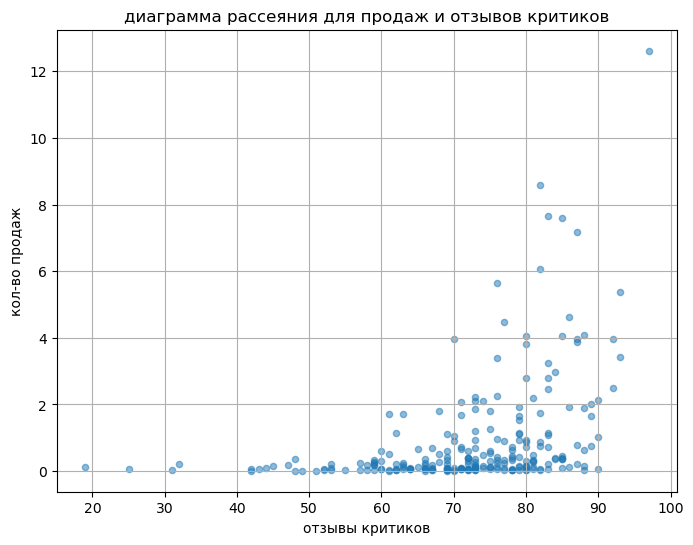

In [51]:
# посмотрим на график
(
    df_top_platform.query('platform == "PS4"')
                   .plot(x='critic_score', y='all_sales', kind='scatter',figsize=(8, 6), legend=True, alpha=0.5, grid = True)
)
  

# установка заголовка графика
plt.title('диаграмма рассеяния для продаж и отзывов критиков')
# добавление подписей осей
plt.xlabel('отзывы критиков')
plt.ylabel('кол-во продаж')
# показ графика
plt.show()

In [52]:
# получим характеристики, дающие представление о корреляции
(
df_top_platform.query('platform == "PS4"')['all_sales'].
    corr(df_top_platform.query('platform == "PS4"')['critic_score'], method='spearman')
)

0.5035124220995204

Связь между продажами и оценками экспертов для всех платформ является прямой, слабой степени выраженности (коэффициент около 0.5). 
 

<font color= 'purple'>**XOne** </font> 

**Влияние отзывов пользователей на кол-во продаж.**

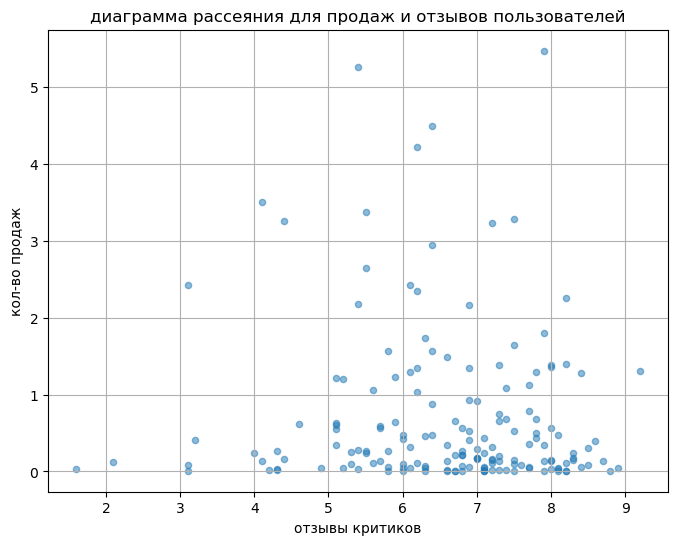

In [53]:
# посмотрим на график
(
    df_top_platform.query('platform == "XOne"')
                   .plot(x='user_score', y='all_sales', kind='scatter',figsize=(8, 6), legend=True, alpha=0.5, grid = True)
)
  

# установка заголовка графика
plt.title('диаграмма рассеяния для продаж и отзывов пользователей')
# добавление подписей осей
plt.xlabel('отзывы критиков')
plt.ylabel('кол-во продаж')
# показ графика
plt.show()

In [54]:
# получим характеристики, дающие представление о корреляции
(
df_top_platform.query('platform == "XOne"')['all_sales'].
    corr(df_top_platform.query('platform == "XOne"')['user_score'], method='spearman')
)

-0.07614016867771539

Корреляция -0.07 и график говорят нам о том, что связи между отзывами пользователей и количеством продаж нет.

**Влияние отзывов критиков на кол-во продаж.**

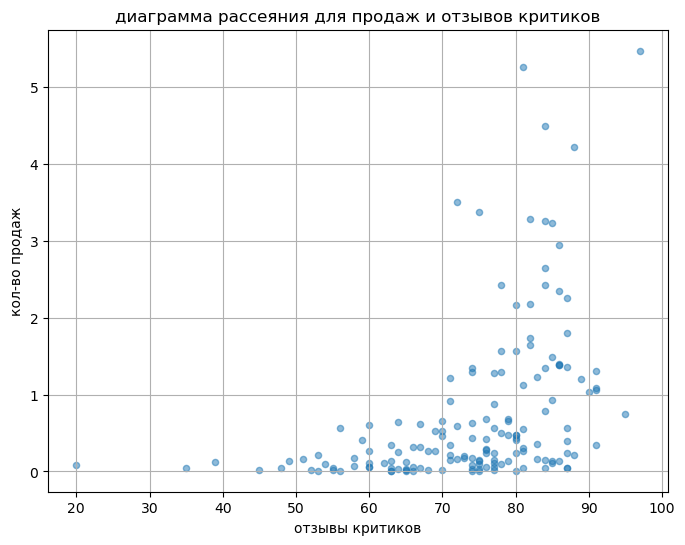

In [55]:
# посмотрим на график
(
    df_top_platform.query('platform == "XOne"')
                   .plot(x='critic_score', y='all_sales', kind='scatter',figsize=(8, 6), legend=True, alpha=0.5, grid = True)
)
  

# установка заголовка графика
plt.title('диаграмма рассеяния для продаж и отзывов критиков')
# добавление подписей осей
plt.xlabel('отзывы критиков')
plt.ylabel('кол-во продаж')
# показ графика
plt.show()

In [56]:
# получим характеристики, дающие представление о корреляции
(
df_top_platform.query('platform == "XOne"')['all_sales'].
    corr(df_top_platform.query('platform == "XOne"')['critic_score'], method='spearman')
)

0.5450763498170512

Связь между продажами и оценками экспертов для всех платформ является прямой, слабой степени выраженности (коэффициент около 0.5). 
 

**Вывод**.
Оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж. Оценки пользователей корреляции с продажами не имеют.


### 3.6. Посмотрим на общее распределение игр по жанрам. 

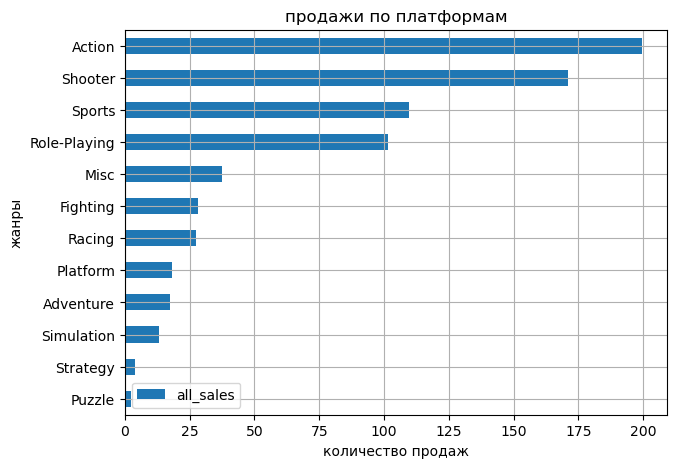

In [57]:
# группируем данные по жанрам, выбираем значение all_sales, по которому мы хотим увидеть сводную таблицу, применяем sum
# сортируем платформы по суммарным продажам
(
    df_new.pivot_table(index='genre', values='all_sales', aggfunc='sum')
      .sort_values(by='all_sales', ascending=True)
      .plot(grid=True, figsize=(7, 5), style='o-', kind='barh')
)
# установка заголовка графика
plt.title('продажи по платформам')
# добавление подписей осей
plt.xlabel('количество продаж')
plt.ylabel('жанры')
# показ графика
plt.show()

Лидерами являются жанры Action, Shooter, Sports. Менее продаваемым жанром является Puzzle.

**Посмотрим на распределение игр по жанрам для выбранных потенциально прибыльных платформ с 2014 по 2016 год.**

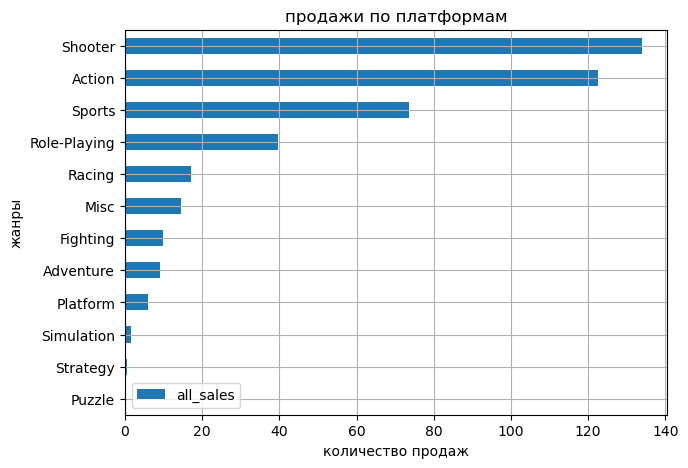

In [58]:
# группируем данные по жанрам, выбираем значение all_sales, по которому мы хотим увидеть сводную таблицу, применяем sum
# сортируем платформы по суммарным продажам
(
    df_top_platform.pivot_table(index='genre', values='all_sales', aggfunc='sum')
      .sort_values(by='all_sales', ascending=True)
      .plot(grid=True, figsize=(7, 5), style='o-', kind='barh')
)
# установка заголовка графика
plt.title('продажи по платформам')
# добавление подписей осей
plt.xlabel('количество продаж')
plt.ylabel('жанры')
# показ графика
plt.show()

Лидеры в таблице поменялись: теперь лидирующими стали Shooter, Action, Sports. 

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по жанрам.**

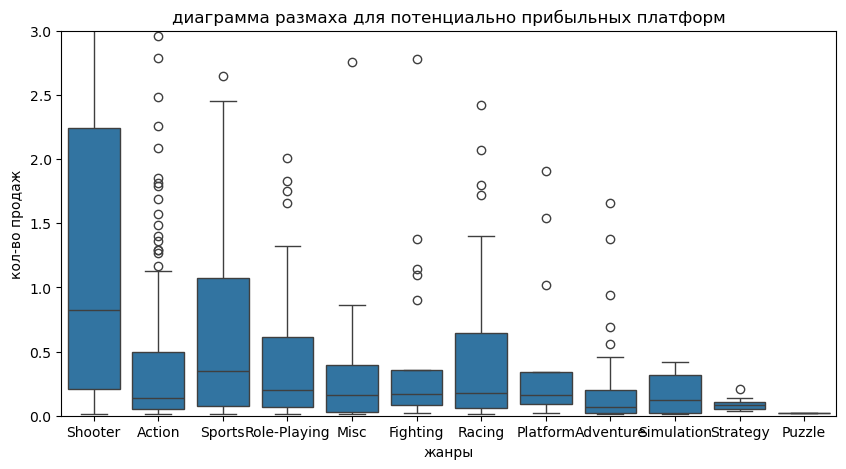

In [59]:
plt.figure(figsize=(10, 5))
(sns.boxplot(data = df_top_platform, y = 'all_sales', x='genre')
    .set(title = 'диаграмма размаха для потенциально прибыльных платформ', 
         xlabel = 'жанры', 
         ylabel = 'кол-во продаж',
         ylim=(0, 3)))
plt.show()

Рассмотрев медианные значения продаж, в топ-3 попали такие жанры, как shooter, sports и rasing, худщими оказались - puzzle, stategy и adventure.

**Вывод.**

Если выбирать все платформы за период с 2014 по 2016 год, то самыми популярными жанрами оказались Action, Shooter, Sports. Наименее популярными Puzzle и Strategy.

Если же рассматривать дополнительное исследование и сравнение медианных значений по продажам в разрезе жанров для выбранных топ платформ можно заметить, что хорошо продаются shooter, sports и rasing, обладающие большим медианным значением прибыли. Худшими оказались - puzzle, stategy и adventure.

Вывод по исследованию игр по жанрам показал, что шутеры превосходят остальные жанры. Данный жанр можно считать привлекательным для продаж. Самым непривлекательным жанром по продажам явялется puzzle.
 



#  Вывод: 

Из данных мы выяснили, что игры выпускались с 1980 по 2016 год.
Данных до 1994 года мало и значительный рост наблюдается уже после 1995 г. 

В период с 1998 по 2016 год наибольшее количество продаж было у игр для PS2. Следующие по продажам стали: X360, PS3, Wii, DS, PS.

Однако, посчитав, что в среднем жизнь платформы составляет примерно 10 лет, а пик продаж достигается примерно через 3-5, то актуальный период для исследования принято было взять с 2014 года, так как данные до этого года уже не актуальны и не помогут составить корректные выводы по исследованию.

С новым временным периодом изменился и топ продаж по платформам, теперь наиболее популярной стала: PS4. По графику также заметно, что до 2015 года растут платформы: PS4, XOne. Остальные только падают. В целом можно сказать, что все эти платформы к 2016 году теряют продажи.

Относительно на пике к 2016 году остаются 2 платформы: PS4, XOne. Следовательно, именно их мы можем считать потенциально прибыльными платформами для планирования рекламной кампании на 2017 год.

Далее мы смотрели связь между отзывами и продажами. удалось выяснить, что связи между отзывами пользователей и количеством продаж нет. Отзывы критиков влияют на продажи, но очень слабо.

Что касается жанров и продаж, то следует учесть, что хорошо продаются shooter, sports и rasing, они обладают большим медианным значением прибыли. Данные жанры можно считать привлекательными для продаж. Самыми непривлекательными жанрами по продажам явялются - puzzle, stategy и adventure.


# 4. Составляем портрет пользователя каждого региона.

**Определите для пользователя каждого региона (NA, EU, JP):**

### 4.1.Самые популярные платформы (топ-5)

<font color= 'purple'>**NA** </font> 

In [61]:
na_platform = df_new.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[:5]

na_platform

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

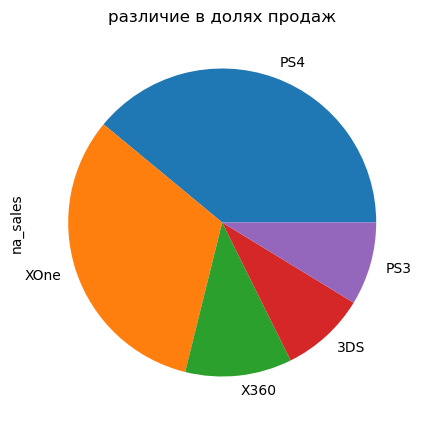

In [62]:
# строим график
na_platform.plot(kind='pie', grid=True, figsize=(5,5))

# установка заголовка графика
plt.title('различие в долях продаж')
# показ графика
plt.show()



Итак, топ 5 платформ для региона NA - это PS4, XOne, 3DS, PS3, X360.

PS4 и XOne занимают большую долю рынка.

<font color= 'purple'>**EU** </font> 

In [63]:
eu_platform = df_new.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[:5]

eu_platform

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

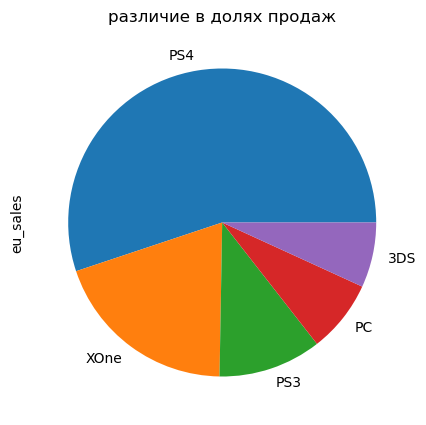

In [64]:
# строим график
eu_platform.plot(kind='pie', grid=True, figsize=(5,5))

# установка заголовка графика
plt.title('различие в долях продаж')
# показ графика
plt.show()

Итак, топ 5 платформ для региона EU - это PS4, XOne, 3DS, PS3, PC.

PS4 занимает большую долю рынка.

<font color= 'purple'>**JP** </font> 

In [65]:
jp_platform = df_new.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[:5]

jp_platform

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

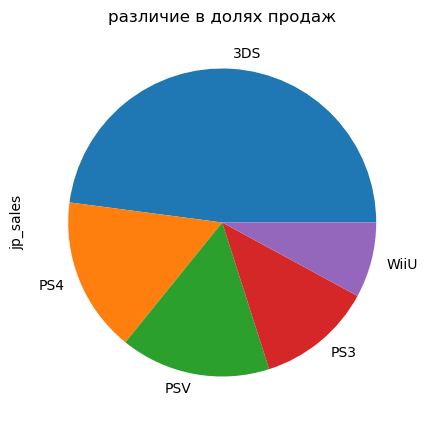

In [66]:
# строим график
jp_platform.plot(kind='pie', grid=True, figsize=(5,5))

# установка заголовка графика
plt.title('различие в долях продаж')
# показ графика
plt.show()

Итак, топ 5 платформ для региона JP - это PS4, WiiU, 3DS, PS3, PSV.

3DS и  PS4 занимает большую долю рынка.

**Для наглядности соединим все значения вмеcте.**

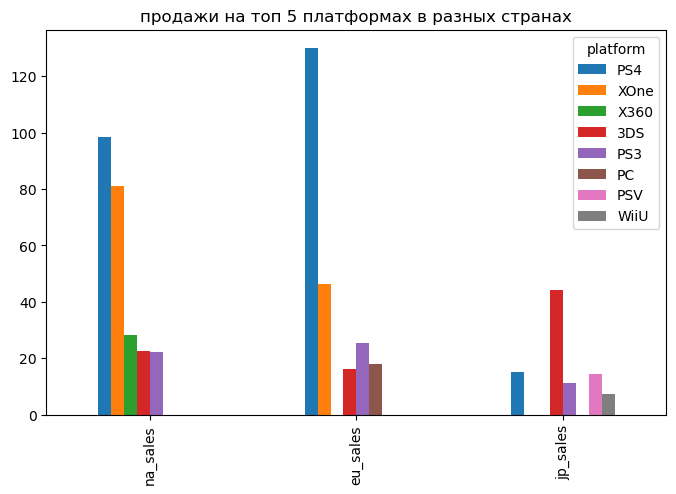

In [67]:
data_platform = pd.DataFrame(data=[na_platform,eu_platform,jp_platform])

data_platform.plot(kind='bar',figsize=(8,5))
# установка заголовка графика
plt.title('продажи на топ 5 платформах в разных странах')
# показ графика
plt.show()

**Вывод.**

На графике заметно, что общее есть между странами NA и EU - первенство занимает PS4, второе место занимает XOne. Так же в топ этих стран входят платформы: 3DS, PS3. 

Совсем иные значения имеет JP: здесь на первом месте стоит 3DS, второе место занимает PS4, а на третьем находится PSV. 

В целом можно сказать, что платформа PS4 достаточно популярна во всех странах.

### 4.2. Самые популярные жанры (топ-5).

<font color= 'purple'>**NA** </font> 

In [68]:
na_genre = df_new.groupby('genre')['na_sales'].sum().sort_values(ascending=False)[:5]

na_genre

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

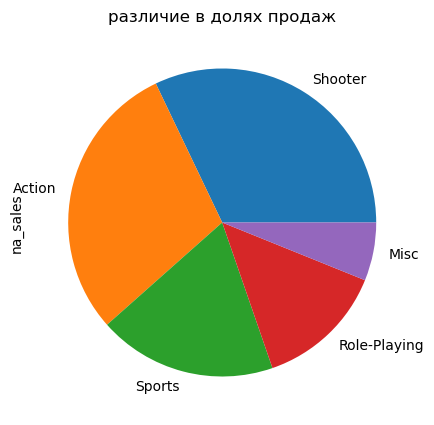

In [69]:
# строим график
na_genre.plot(kind='pie', grid=True, figsize=(5,5))

# установка заголовка графика
plt.title('различие в долях продаж')
# показ графика
plt.show()

Итак, топ 5 жанров для региона NA - это Shooter, Action, Sports, Role-Playing, Misc.

Shooter, Action занимают большую долю рынка.

<font color= 'purple'>**EU** </font> 

In [70]:
eu_genre = df_new.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)[:5]

eu_genre

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

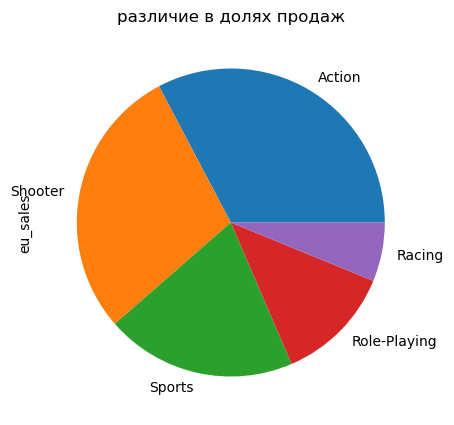

In [71]:
# строим график
eu_genre.plot(kind='pie', grid=True, figsize=(5,5))

# установка заголовка графика
plt.title('различие в долях продаж')
# показ графика
plt.show()

Итак, топ 5 жанров для региона EU - это Shooter, Action, Sports, Role-Playing, Racing.

Shooter, Action занимают большую долю рынка.

<font color= 'purple'>**JP** </font> 

In [72]:
jp_genre = df_new.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)[:5]

jp_genre 

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

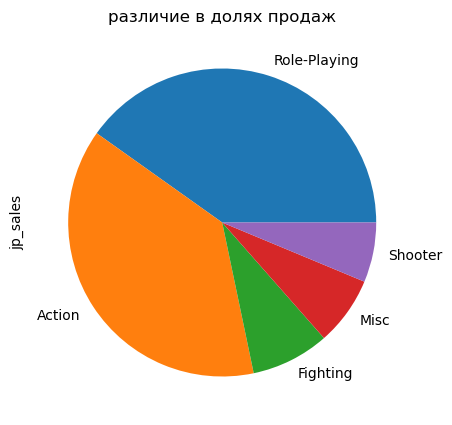

In [73]:
# строим график
jp_genre.plot(kind='pie', grid=True, figsize=(5,5))

# установка заголовка графика
plt.title('различие в долях продаж')
# показ графика
plt.show()

Итак, топ 5 жанров для региона JP - это Role-Playing, Action, Fighting, Misc, Shooter/

Role-Playing, Action занимают большую долю рынка.

**Для наглядности соединим все значения вмеcте.**

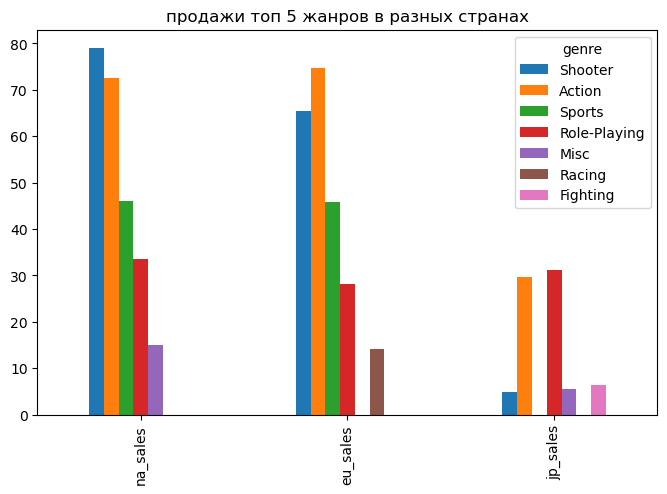

In [74]:
data_genre = pd.DataFrame(data=[na_genre, eu_genre, jp_genre])

data_genre.plot(kind='bar',figsize=(8,5))
# установка заголовка графика
plt.title('продажи топ 5 жанров в разных странах')
# показ графика
plt.show()

**Вывод.**

Здесь мы наблюдаем похожую картину, что и сплатформами.

На графике заметно, что общее есть между странами NA и EU - общее 3 и 4 место занимают Sports, Role-Playing. Хоть первые 2 места различаются, однако не с большим отрывом: у NA -первое место занимает Shooter, второе - Action, у EU наоборот.

Совсем иные значения имеет JP: здесь на первом месте стоит Role-Playing, второе место занимает Action, а на третьем находится Fighting. 

В целом можно сказать, что жанр Action достаточно популярен во всех странах.

### 4.3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

<font color= 'purple'>**NA** </font> 

In [75]:
na_rating = df_new.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

na_rating

rating
M          96.42
unknown    64.72
E          50.74
T          38.95
E10+       33.23
Name: na_sales, dtype: float64

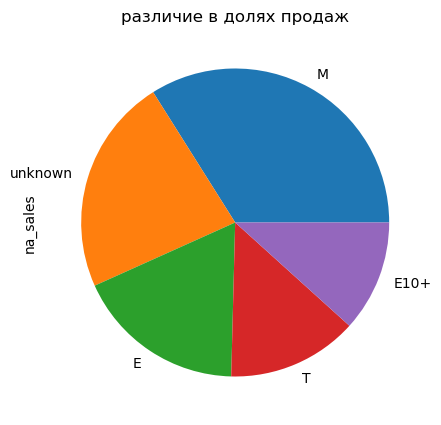

In [76]:
# строим график
na_rating.plot(kind='pie', grid=True, figsize=(5,5))

# установка заголовка графика
plt.title('различие в долях продаж')
# показ графика
plt.show()

Итак, для NA продаж больше весго было при выставлении рейтинка М, дальше следует рейтинг Е, после примерно одинаковые Т и Е10+.


<font color= 'purple'>**EU** </font> 

In [77]:
eu_rating = df_new.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

eu_rating

rating
M          93.44
unknown    58.95
E          58.06
T          34.07
E10+       26.16
Name: eu_sales, dtype: float64

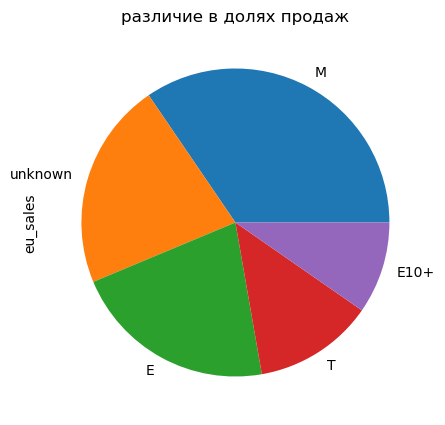

In [78]:
# строим график
eu_rating.plot(kind='pie', grid=True, figsize=(5,5))

# установка заголовка графика
plt.title('различие в долях продаж')
# показ графика
plt.show()

Итак, для EU продаж больше весго было при выставлении рейтинка М, дальше следует рейтинг Е, после примерно одинаковые Т и Е10+. 

<font color= 'purple'>**JP** </font> 

In [79]:
jp_rating = df_new.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

jp_rating

rating
unknown    56.90
T          14.78
E           8.94
M           8.01
E10+        4.46
Name: jp_sales, dtype: float64

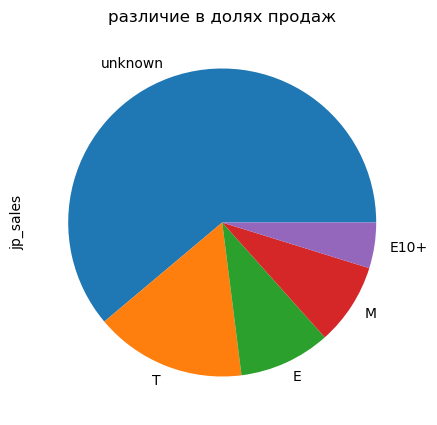

In [80]:
# строим график
jp_rating.plot(kind='pie', grid=True, figsize=(5,5))

# установка заголовка графика
plt.title('различие в долях продаж')
# показ графика
plt.show()

Итак, для JP продаж больше весго было при выставлении рейтинка T, дальше следует рейтинг Е, после примерно одинаковые M и Е10+.
Большое количество неизвестных оценок.

**Для наглядности соединим все значения вмеcте.**

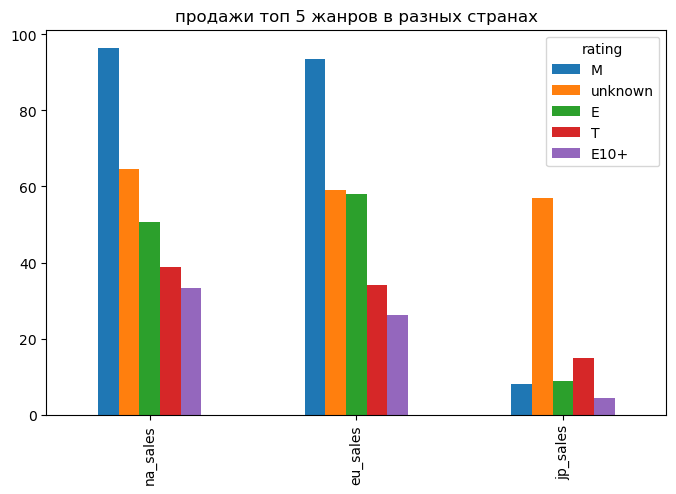

In [81]:
data_rating = pd.DataFrame(data=[na_rating, eu_rating, jp_rating])

data_rating.plot(kind='bar',figsize=(8,5))
# установка заголовка графика
plt.title('продажи топ 5 жанров в разных странах')
# показ графика
plt.show()

**Вывод.**

Здесь мы наблюдаем похожую картину, что и с платформами и жанрами.

На графике заметно, что общее есть между странами NA и EU - продаж больше весго было при выставлении рейтинка М, дальше следует рейтинг Е, после примерно одинаковые Т и Е10+.

Совсем иные значения имеет JP: продаж больше весго было при выставлении рейтинка T, дальше следует рейтинг Е, после примерно одинаковые M и Е10+ 
 

#  Вывод:

На всех графиках заметно, что общее есть между странами NA и EU. И достаточно сильно отличается от них JP.


Так, самые популярные **платформы** у NA и EU - PS4 и XOne. У JP - 3DS и PS4.

В целом можно сказать, что платформа PS4 достаточно популярна во всех странах.


Самые популярные **жанры** у NA и EU - Shooter и Action. У JP - Role-Playing и Action.

В целом можно сказать, что жанр Action достаточно популярен во всех странах.


Влияние **рейтинга** на продажи следующее:у NA и EU - продаж больше весго было при выставлении рейтинка М, дальше следует рейтинг Е. У JP: продаж больше весго было при выставлении рейтинка T, дальше следует рейтинг Е





# 5. Общий вывод.

За время исследования нам удалось:
1. **Изучить общую информацию по датафрейму и отметить ход работы.**


2. **Провести предобработку данных**, а именно, переименовать название столбцов, заполнить пропуски в таблице, изменить тип данных, добавить в таблицу новый столбец.


3. **Провести исследовательский анализ данных** и выявить законмерности. О них чуть больше.
* Из данных мы выяснили, что игры выпускались с 1980 по 2016 год. Данных до 1994 года мало и значительный рост наблюдается уже после 1995 г.
* В период с 1998 по 2016 год наибольшее количество продаж было у игр для PS2. Следующие по продажам стали: X360, PS3, Wii, DS, PS.
* Однако, посчитав, что в среднем жизнь платформы составляет примерно 10 лет, а пик продаж достигается примерно через 3-5, то актуальный период для исследования принято было взять с 2014 года, так как данные до этого года уже не актуальны и не помогут составить корректные выводы по исследованию.
* С новым временным периодом изменился и топ продаж по платформам, теперь наиболее популярной стала: PS4. По графику также заметно, что до 2015 года растут платформы: PS4, XOne. Остальные только падают. В целом можно сказать, что все эти платформы к 2016 году теряют продажи.
* Относительно на пике к 2016 году остаются 2 платформы: PS4, XOne. Следовательно, именно их мы можем считать потенциально прибыльными платформами для планирования рекламной кампании на 2017 год.
* Далее мы смотрели связь между отзывами и продажами. удалось выяснить, что связи между отзывами пользователей и количеством продаж нет. Отзывы критиков влияют на продажи, но очень слабо.
* Что касается жанров и продаж, то следует учесть, что хорошо продаются жанры shooter, sports и rasing, они обладают большим медианным значением прибыли. Данные жанры можно считать привлекательными для продаж. Самыми непривлекательными жанрами по продажам явялются - puzzle, stategy и adventure.

4. **Составить портрет пользователя каждого региона**.
* На всех графиках заметно, что общее есть между странами NA и EU. И достаточно сильно отличается от них JP.
* Так, самые популярные платформы у NA и EU - PS4 и XOne. У JP - 3DS и PS4. В целом можно сказать, что платформа PS4 достаточно популярна во всех странах.
* Самые популярные жанры у NA и EU - Shooter и Action. У JP - Role-Playing и Action. В целом можно сказать, что жанр Action достаточно популярен во всех странах.
* Влияние рейтинга на продажи следующее:у NA и EU - продаж больше весго было при выставлении рейтинка М, дальше следует рейтинг Е. У JP: продаж больше весго было при выставлении рейтинка T, дальше следует рейтинг Е.


5. **Итоговый вывод**.

Исходя из данных, следует опираться на следующие критерии игровой индустрии при планировании рекламной компании на 2017 год:  
1. Для американской аудитории следует выбирать:
* платформу PS4 или XOne,
* жанр Shooter, 
* рейтинг М (для взрослых)

2. Для европейской аудитории:
* платформу PS4 или XOne,
* жанр Action, 
* рейтинг М (для взрослых)

3. Для японской аудитории:
* платформу 3DS,
* жанр Role-Playing, 
* рейтинг T (игры для лиц от 13 лет)
<br />  
